<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---

# **Churn Prediction (Previsão de Rotatividade de Clientes)**

A **Churn Prediction**, também conhecida como previsão de rotatividade de clientes, é uma técnica que utiliza análise de dados para antecipar quais **clientes** têm **maior probabilidade** de **cancelar** um **serviço** ou **deixar de adquirir um produto**. Essa abordagem é extensamente empregada por empresas de diversos setores, como telecomunicações, varejo, serviços financeiros e tecnologia. Seu objetivo é evitar a perda de clientes, bem como aprimorar a satisfação e a fidelização dos mesmos.

A previsão de churn é de extrema importância, visto que a rotatividade de clientes pode acarretar diversos prejuízos para uma empresa. Esses impactos podem incluir diminuição das receitas, redução da parcela de mercado e aumento dos custos relacionados à aquisição de novos clientes. Adicionalmente, a perda de clientes pode servir como um indicativo de problemas nos processos de atendimento ao cliente ou nos produtos ofertados. Essas questões podem ser endereçadas e resolvidas para melhorar a qualidade global da empresa.

A aplicação da previsão de churn possibilita que as empresas identifiquem os clientes com maior probabilidade de deixar de fazer negócios com elas. Isso, por sua vez, permite a adoção de estratégias direcionadas para reter esses clientes, o que pode envolver a oferta de benefícios especiais, promoções ou melhorias nos produtos e serviços oferecidos. Dessa forma, a previsão de churn não somente contribui para a manutenção de receitas e a ampliação da base de clientes, mas também auxilia na construção de um relacionamento mais duradouro e satisfatório com os consumidores.

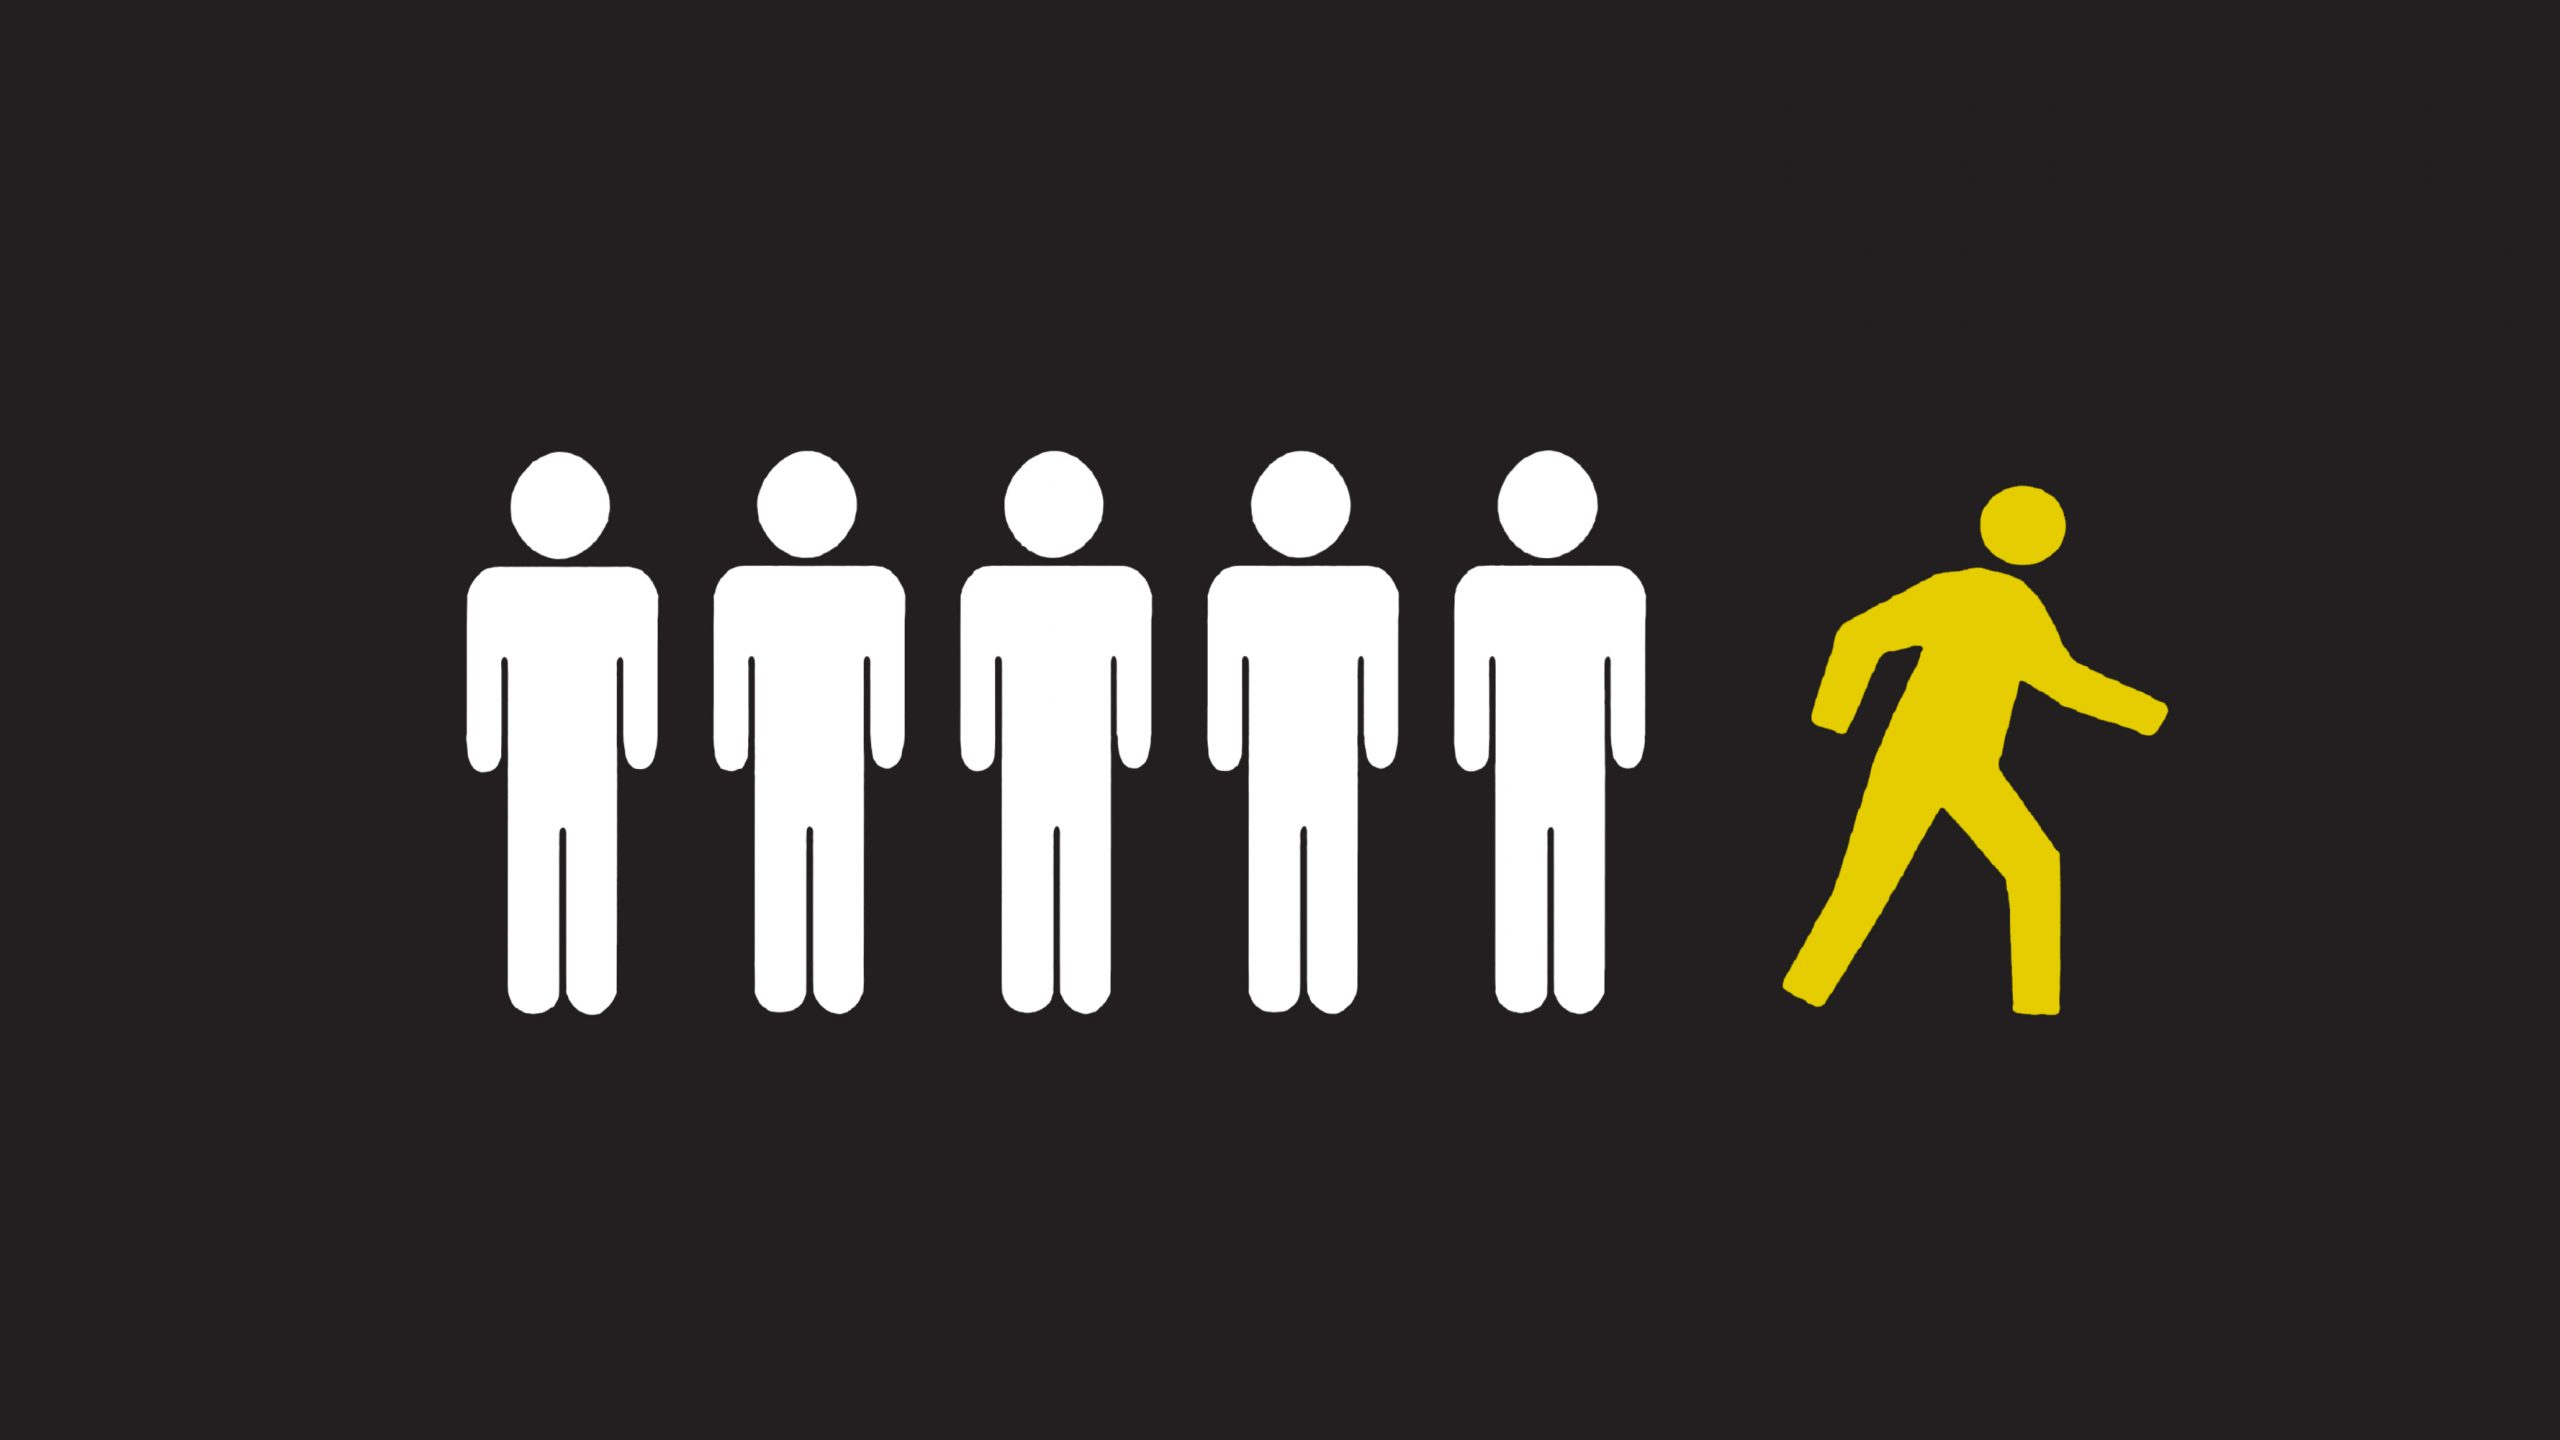

# **Aquisição dos Dados**

Os dados utilizados para este projeto foram originalmente disponibilizados na plataforma de ensino da [IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#). Eles se referem a um cenário típico de uma empresa de telecomunicações. O conjunto de dados completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar da ausência de informações explícitas, os nomes das colunas fornecem insights acerca da natureza do problema em questão.

In [6]:
# Importação de bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importação de bibliotecas para machine learning e pré-processamento
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importação de bibliotecas para classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Importação de bibliotecas para balanceamento de classes
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Importação de bibliotecas para métricas de avaliação
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score

In [ ]:
pip install scikit-plot

In [5]:
import scikitplot as skplt

In [7]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

**Análise dos Dados**

A fase de análise dos dados busca proporcionar uma compreensão aprofundada da estrutura subjacente dos dados.

**Dicionário das Variáveis**

- `customerID:` Identificador exclusivo do cliente.
- `gender:` Gênero do cliente (Masculino/Feminino).
- `SeniorCitizen:` Variável binária que indica se o cliente é idoso ou aposentado (1) ou não (0).
- `Partner:` Variável binária que indica se o cliente tem um parceiro (Sim) ou não (Não).
- `Dependents:` Variável binária que indica se o cliente possui dependentes (Sim) ou não (Não).
- `tenure:` Número de meses que o cliente tem sido assinante dos serviços da empresa.
- `PhoneService:` Variável binária que indica se o cliente possui serviço de telefone (Sim) ou não (Não).
- `MultipleLines:` Indica se o cliente tem várias linhas telefônicas (Sim), apenas uma linha (Não) ou se não possui serviço de telefone (Sem serviço de telefone).
- `InternetService:` Indica se o cliente tem serviço de internet por fibra óptica (Fibra óptica), DSL (DSL) ou não possui serviço de internet (Sem serviço).
- `OnlineSecurity:` Indica se o cliente tem segurança online (Sim), não possui serviço de internet (Sem serviço de internet) ou não possui serviço de segurança (Sem serviço).
- `OnlineBackup:` Indica se o cliente possui backup online (Sim), não possui backup (Não) ou não possui serviço de internet (Sem serviço de internet).
- `DeviceProtection:` Indica se o cliente possui proteção de dispositivo (Sim), não possui proteção (Não) ou não possui serviço de internet (Sem serviço de internet).
- `TechSupport:` Indica se o cliente possui suporte técnico (Sim), não possui suporte (Não) ou não possui serviço de internet (Sem serviço de internet).
- `StreamingTV:` Indica se o cliente possui serviço de streaming de TV (Sim), não possui serviço de streaming de TV (Não) ou não possui serviço de internet (Sem serviço de internet).
- `StreamingMovies:` Indica se o cliente possui serviço de streaming de filmes (Sim), não possui serviço de streaming de filmes (Não) ou não possui serviço de internet (Sem serviço de internet).
- `Contract:` Indica o tipo de contrato que o cliente possui com a empresa (Mensal, Anual ou Bienal).
- `PaperlessBilling:` Variável binária que indica se o cliente optou por fatura eletrônica (Sim) ou não (Não).
- `PaymentMethod:` Indica o método de pagamento utilizado pelo cliente (Transferência bancária automática, Cartão de crédito automático, Cheque eletrônico ou Cheque enviado).
- `MonthlyCharges:` Valor mensal cobrado ao cliente.
- `TotalCharges:` Valor total cobrado do cliente durante o período em que foi assinante.
- `Churn:` Variável binária que indica se o cliente cancelou o serviço (Sim) ou não (Não).

# **Análise Exploratória dos Dados**

A análise exploratória de dados busca fornecer uma compreensão inicial das variáveis presentes no conjunto de dados, abordando os seguintes aspectos:

1. Contexto geral das variáveis.
2. Percentual de valores ausentes.
3. Equilíbrio do conjunto de dados.
4. Cancelamento em relação ao gênero.
5. Cancelamento em relação ao valor mensal pago.
6. Boxplot para variáveis numéricas.

Começaremos explorando as cinco primeiras entradas do conjunto de dados para obter uma visão geral da sua estrutura.

In [8]:
# Ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
